In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

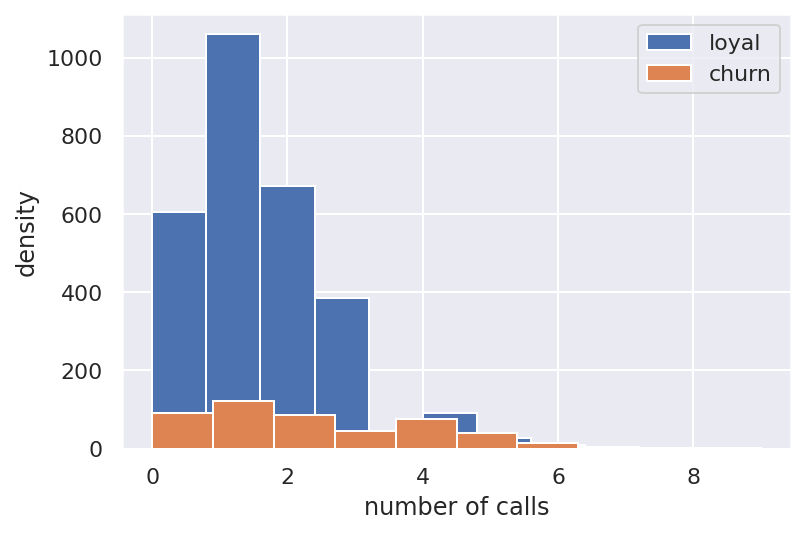

In [6]:
telecom_data = pd.read_csv("Telecom_dataset.csv")

telecom_data.loc[telecom_data["churn"] == False, 'customer service calls'].hist(label="loyal")
telecom_data.loc[telecom_data["churn"] == True, "customer service calls"].hist(label='churn')

plt.xlabel("number of calls")
plt.ylabel("density")
plt.legend()

In [7]:
def get_bootstrap_samples(data, n_samples):
  indices = np.random.randint(0, len(data), (n_samples, len(data)))
  samples = data[indices]
  return samples

def stat_intervals(stat, alpha):
  boundaries = np.percentile(stat, [100 * alpha / 2.0, 100 * (1 - alpha / 2.0)])
  return boundaries

loyal_calls = telecom_data.loc[
  telecom_data["churn"] == False, "customer service calls"
].values
churn_calls = telecom_data.loc[
  telecom_data["churn"] == True, "customer service calls"
].values

np.random.seed(0)
loyal_mean_scores = [
  np.mean(sample) for sample in get_bootstrap_samples(loyal_calls, 1000)
]

churn_mean_scores = [
  np.mean(sample) for sample in get_bootstrap_samples(churn_calls, 1000)
]

print(
    "Service calls from loyal: mean interval",
     stat_intervals(loyal_mean_scores, 0.05)
)

print(
    "Service calls from churn: mean interval",
      stat_intervals(churn_mean_scores, 0.05)
)

Service calls from loyal: mean interval [1.4077193  1.49473684]
Service calls from churn: mean interval [2.0621118  2.39761905]
